<a href="https://colab.research.google.com/github/sanji-krishna-MP/ML-Project_2-Algerian-forest-fire-Prediction-/blob/main/Model_training_with_the_Algerian_forest_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Algerian_forest_fires_dataset_cleaned (1).csv")

In [ ]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  245 non-null    int64  
 1   RH           245 non-null    int64  
 2   Ws           245 non-null    int64  
 3   Rain         245 non-null    float64
 4   FFMC         245 non-null    float64
 5   DMC          245 non-null    float64
 6   DC           245 non-null    float64
 7   ISI          245 non-null    float64
 8   BUI          245 non-null    float64
 9   FWI          245 non-null    float64
 10  Classes      245 non-null    int64  
 11  Region       245 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 23.1 KB


In [ ]:
###seperating the independent and dependent features
x = df.drop("FWI",axis = 1)
y = df["FWI"]

In [ ]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [ ]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [ ]:
###creating the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(183, 11)
(62, 11)
(183,)
(62,)


In [ ]:
###FEATURE SELECTION BASED ON CORELLATION
#HIGHLY NEGATIVE CORRELATED CAN BE USEFUL BUT HIGHLY POSITIVE WE NEED TO REMOVE

<Axes: >

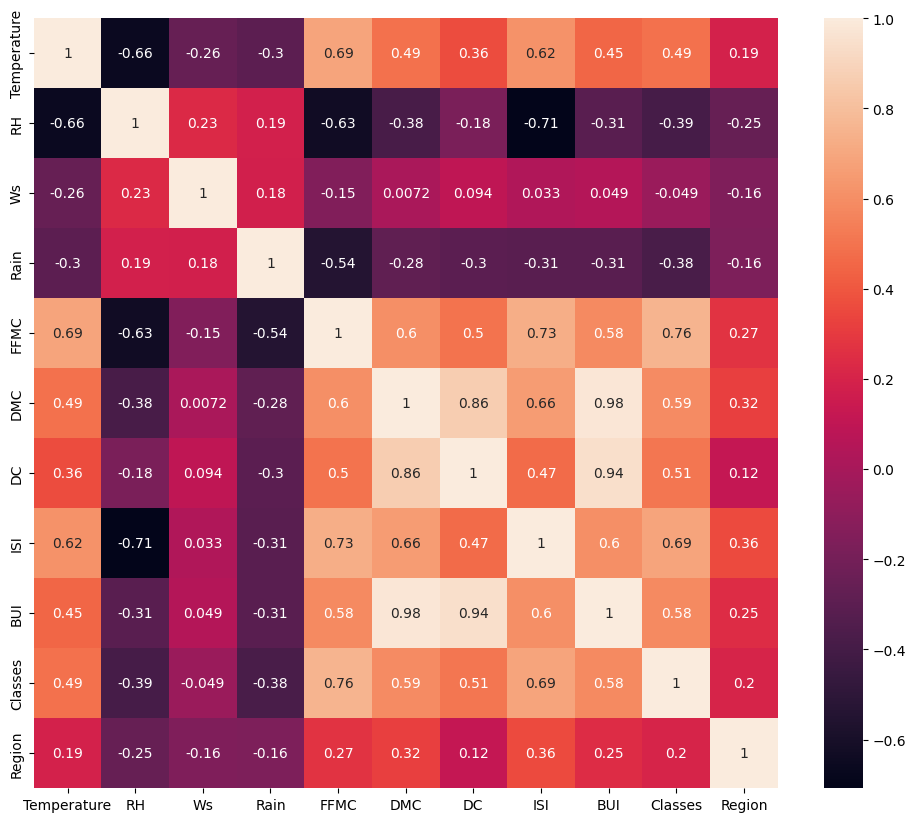

In [ ]:
#CHECKING FOR MULTICOLINEARITY(ie INDEPENDENT FEATURES MUST NOT BE MUCH CORRELATED)
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr,annot = True)

In [ ]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
correlation(x_train,0.85)

{'BUI', 'DC'}

In [ ]:
##droping the highly correlated features
x_train.drop('BUI',axis = 1,inplace = True)
x_train.drop('DC',axis = 1,inplace = True)
x_test.drop('BUI',axis = 1,inplace = True)
x_test.drop('DC',axis = 1,inplace = True)

In [ ]:
x_train.shape

(183, 9)

In [ ]:
###standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

Text(0.5, 1.0, 'after scaling')

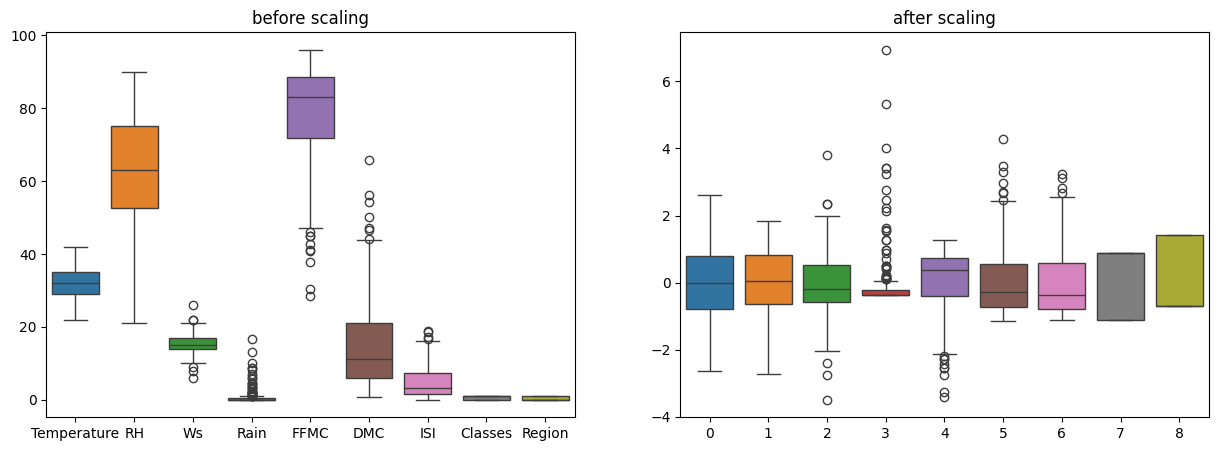

In [ ]:
###visualising the outliers
#before scaling
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title("after scaling")


In [ ]:
###model training(LINEAR REGRESSION)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mae)
print(r2)

0.6016646036853628
0.9858890543384773


Text(0, 0.5, 'y_pred')

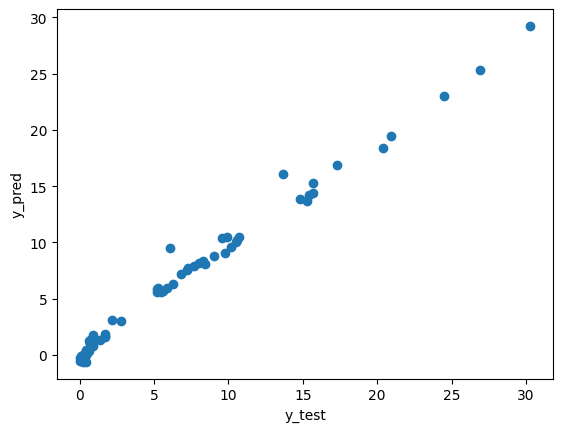

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [ ]:
#LASSO REGRESSION
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE",mae)
print("R2_SCORE",r2)

MAE 1.1829003920998284
R2_SCORE 0.9474169868503985


Text(0, 0.5, 'y_pred')

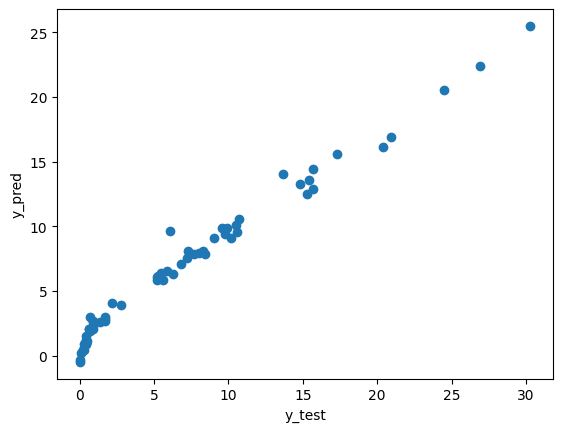

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [ ]:
#Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge(alpha=1)
ridge.fit(x_train_scaled, y_train)

y_pred = ridge.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2_SCORE:", r2)


MAE: 0.6171374248956087
R2_SCORE: 0.9853824987237946


Text(0, 0.5, 'y_pred')

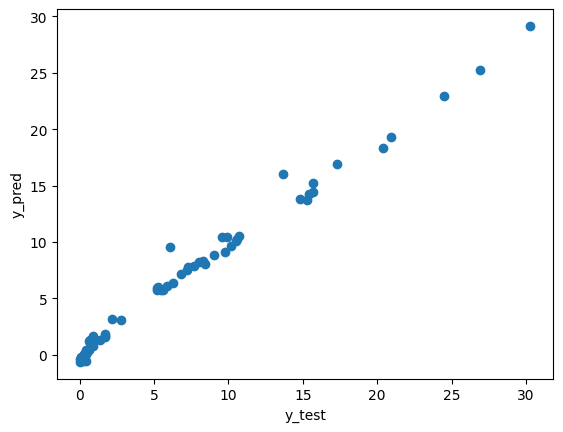

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [ ]:
##ELASTIC REGRESSION
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score


elastic = ElasticNet()

elastic.fit(x_train_scaled, y_train)

# Predict
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("R2_SCORE:", r2)


MAE: 1.8202010930069845
R2_SCORE: 0.8870729493306742


Text(0, 0.5, 'y_pred')

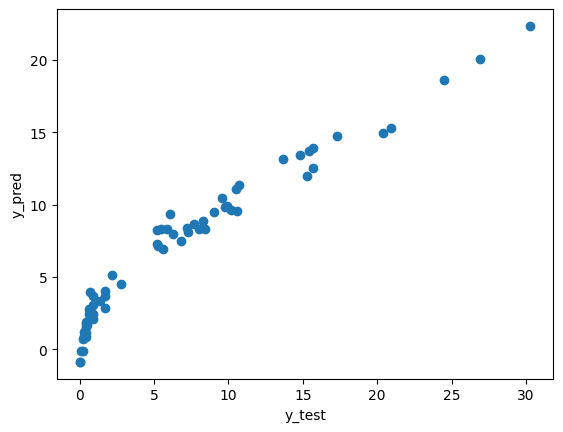

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score


ridge = Ridge()


param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}


grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(x_train_scaled, y_train)


best_ridge = grid_search.best_estimator_
print("Best alpha:", grid_search.best_params_['alpha'])


y_pred = best_ridge.predict(x_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE after tuning:", mae)
print("R2_SCORE after tuning:", r2)


Best alpha: 1
MAE after tuning: 0.6171374248956087
R2_SCORE after tuning: 0.9853824987237946


Final Prediction with real world values

In [ ]:
import numpy as np
import pandas as pd


sample = np.array([[1.4, 2.1, 0.5, 3.2, 0.9, 4.5, 1.1, 2.2, 0.7]])

sample_df = pd.DataFrame(sample, columns=x_train.columns)

sample_scaled = scaler.transform(sample_df)


prediction = best_ridge.predict(sample_scaled)

print("Prediction:", prediction[0])



Prediction: 7.431453201801604
